In [2]:
import pandas as pd 
from pathlib import Path

from utils import calculate_novelty, calculate_validity, calculate_uniqueness   

In [3]:
data_dir = Path('..') / '..' / 'DataPipeline' / 'data' / 'scored_data'
zinc_scored_data = pd.read_csv(data_dir / 'scored_zinc.csv')
score_data = pd.read_csv(data_dir / 'output.csv')

data_smiles_list = score_data['smiles'].tolist()

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import SVG

def plot_molecules(df, num_mols=5):
    mols = [Chem.MolFromSmiles(smiles) for smiles in df['smiles'].head(num_mols)]
    return Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), useSVG=True)

In [ ]:
plot_molecules(score_data, num_mols=100)

In [6]:
validity, valid_molecules = calculate_validity(data_smiles_list)
uniqueness, unique_molecules = calculate_uniqueness(valid_molecules)
novelty, non_new_mols = calculate_novelty(unique_molecules, zinc_scored_data['smiles'].tolist())

[18:59:30] Explicit valence for atom # 16 N, 4, is greater than permitted
[18:59:30] Explicit valence for atom # 20 N, 4, is greater than permitted
[18:59:31] Explicit valence for atom # 19 C, 5, is greater than permitted
[18:59:31] Explicit valence for atom # 17 N, 4, is greater than permitted
[18:59:31] Explicit valence for atom # 2 Br, 3, is greater than permitted


In [7]:
print("Validity: ", validity)
print("Unique: ", uniqueness)
print("Novelty: ", novelty)

Validity:  0.9995
Unique:  0.9998999499749875
Novelty:  0.9983990394236542


In [11]:
# Return valid molecules dataset among the generated molecules

valid_mols_df = score_data[score_data['smiles'].isin(valid_molecules)]

In [13]:
# Compute Wasserstein distance with scipy

from scipy.stats import wasserstein_distance

print( "Wasserstein distance for weight: ", wasserstein_distance(valid_mols_df['weight'], zinc_scored_data['weight']))
print( "Wasserstein distance for SA: ", wasserstein_distance(valid_mols_df['SA'], zinc_scored_data['SA']))
print( "Wasserstein distance for logP: ", wasserstein_distance(valid_mols_df['logP'], zinc_scored_data['logP']))
print( "Wasserstein distance for QED: ", wasserstein_distance(valid_mols_df['QED'], zinc_scored_data['QED']))
print( "Wasserstein distance for n_rings: ", wasserstein_distance(valid_mols_df['n_rings'], zinc_scored_data['n_rings']))

Wasserstein distance for weight:  19.882843209883394
Wasserstein distance for SA:  0.08068070299817572
Wasserstein distance for logP:  0.1340496732726068
Wasserstein distance for QED:  0.0021365008763285648
Wasserstein distance for n_rings:  0.30032867549206244


C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\3181321703.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zinc_scored_data['logP'], label='ZINC')
C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\3181321703.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score_data['logP'], label='Ge

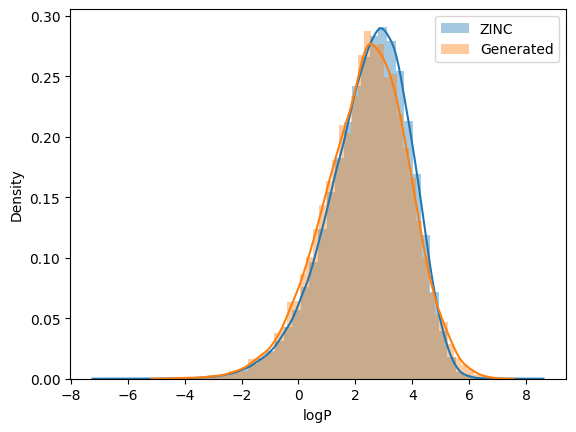

In [17]:
# Plot logP of generated molecules vs ZINC with normalized y axis

zinc_scored_data['logP'] = zinc_scored_data['logP'].astype(float)
score_data['logP'] = score_data['logP'].astype(float)

import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(zinc_scored_data['logP'], label='ZINC')
sns.distplot(score_data['logP'], label='Generated')
plt.legend()
plt.show()


C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\2430501753.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zinc_scored_data['SA'], label='ZINC')
C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\2430501753.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score_data['SA'], label='Generat

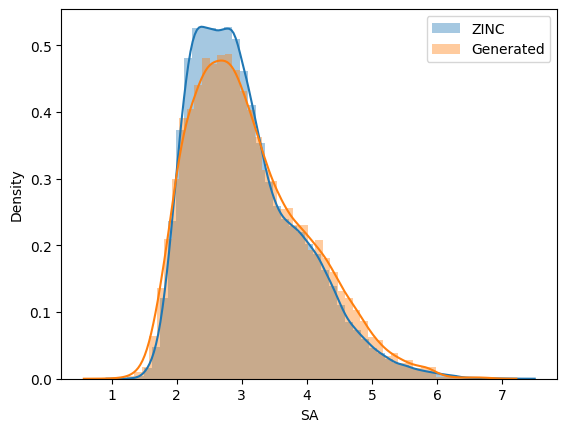

In [18]:
# Plot SA of generated molecules vs ZINC with normalized y axis

zinc_scored_data['SA'] = zinc_scored_data['SA'].astype(float)
score_data['SA'] = score_data['SA'].astype(float)

sns.distplot(zinc_scored_data['SA'], label='ZINC')
sns.distplot(score_data['SA'], label='Generated')
plt.legend()
plt.show()

C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\85417246.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zinc_scored_data['QED'], label='ZINC')
C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\85417246.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score_data['QED'], label='Generated

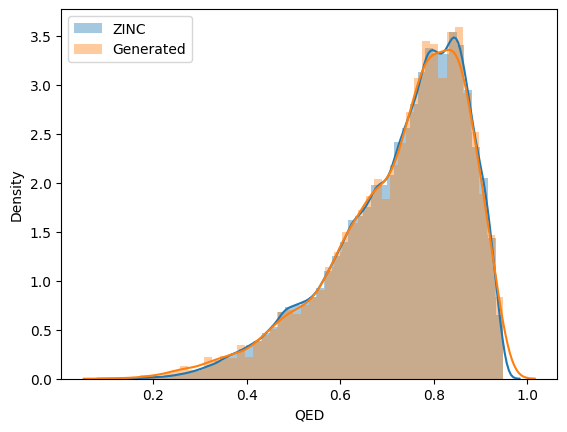

In [19]:
# Plot QED of generated molecules vs ZINC with normalized y axis

zinc_scored_data['QED'] = zinc_scored_data['QED'].astype(float)
score_data['QED'] = score_data['QED'].astype(float)

sns.distplot(zinc_scored_data['QED'], label='ZINC')
sns.distplot(score_data['QED'], label='Generated')

plt.legend()
plt.show()

C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\2940979436.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zinc_scored_data['weight'], label='ZINC')
C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\2940979436.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score_data['weight'], label=

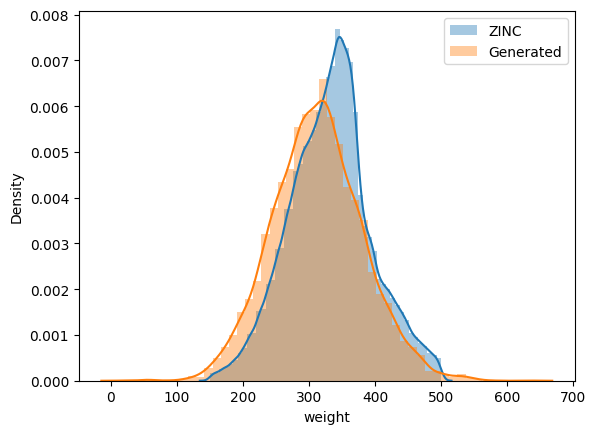

In [20]:
# Plot weight of generated molecules vs ZINC with normalized y axis

zinc_scored_data['weight'] = zinc_scored_data['weight'].astype(float)
score_data['weight'] = score_data['weight'].astype(float)

sns.distplot(zinc_scored_data['weight'], label='ZINC')
sns.distplot(score_data['weight'], label='Generated')

plt.legend()
plt.show()

C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\1927044376.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zinc_scored_data['n_rings'], label='ZINC')
C:\Users\goupi\AppData\Local\Temp\ipykernel_25748\1927044376.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(score_data['n_rings'], labe

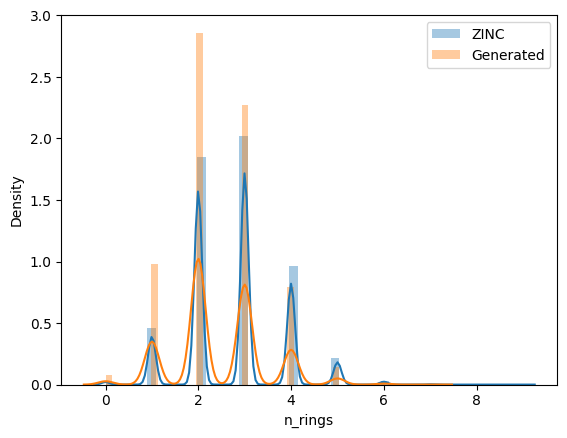

In [21]:
# Plot n_rings of generated molecules vs ZINC with normalized y axis

zinc_scored_data['n_rings'] = zinc_scored_data['n_rings'].astype(float)
score_data['n_rings'] = score_data['n_rings'].astype(float)

sns.distplot(zinc_scored_data['n_rings'], label='ZINC')
sns.distplot(score_data['n_rings'], label='Generated')

plt.legend()
plt.show()